In [57]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Reading the file
df = pd.read_csv("goodreads.csv", encoding = "ISO-8859-1", engine='python')



In [59]:
#Reading the first five records
df.head()

,Id,title,genre,Unnamed: 3,authors,Rating,Desc,url,Unnamed: 8,Unnamed: 9
0,1,Harry Potter and the Half-Blood Prince,Fantasy Fiction,NaN,J.K. Rowling,4.57,The war against Voldemort is not going well; e...,https://encrypted-tbn0.gstatic.com/images?q=tb...,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix,Fantasy Fiction,NaN,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,https://encrypted-tbn0.gstatic.com/images?q=tb...,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone,Fantasy Fiction,NaN,J.K. Rowling,4.47,Harrys perfectly normal life at number 4 priv...,https://encrypted-tbn0.gstatic.com/images?q=tb...,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets,Fantasy Fiction,NaN,J.K. Rowling,4.42,Harry Potter is about to start his second year...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban ),Fantasy Fiction,NaN,J.K. Rowling,4.57,Harry Potter and the Prisoner of Azkaban is th...,https://www.google.com/url?sa=i&url=https%3A%2...,NaN,NaN


In [60]:
#Checking the shape of the file
df.shape

(18, 10)

In [61]:
#Exploratory Data Analysis

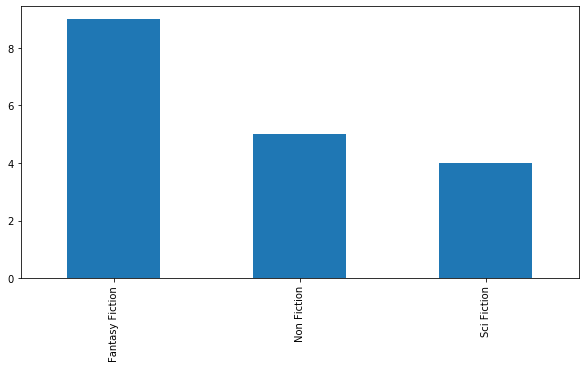

In [62]:
# Genre distribution
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [63]:
# Printing the book title and description randomly
df['title'] 
df['Desc']

0     The war against Voldemort is not going well; e...
1     There is a door at the end of a silent corrido...
2     Harrys perfectly normal life at number 4 priv...
3     Harry Potter is about to start his second year...
4     Harry Potter and the Prisoner of Azkaban is th...
5     Schools come together for an ultimate competit...
6     Author J. K. Rowling does something amazing wi...
7     The war against Voldemort is not going well; e...
8     Author J. K. Rowling does something amazing wi...
9     Seconds before the Earth is demolished to make...
10    ""The Hitchhiker's Guide to the Galaxy"\n\nSec...
11    "Seconds before the Earth is demolished to mak...
12    "Suppose a good friend calmly told you over a ...
13    Bryson's biggest book, he confronts his greate...
14    In the early fall of 2002, famed travel Writer...
15    A revised and updated edition of a humorous pr...
16    Despite the fact that Australia harbors more t...
17    After living in Britain for two decades, B

In [64]:
#Book description — Word count distribution

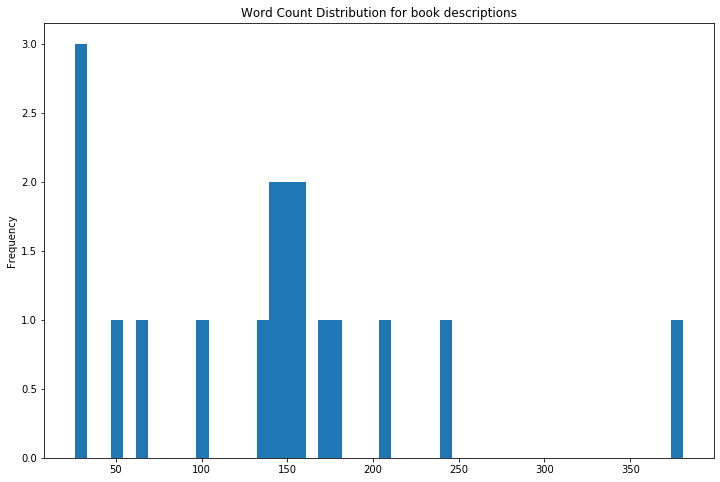

In [107]:
# Calculating the word count for book description
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

In [66]:
#import nltk
#nltk.download()
#It will open a page for corpus download.Download all the packages

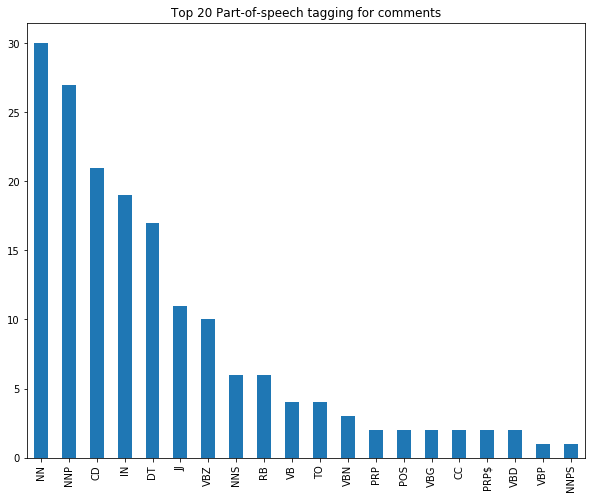

In [67]:
#The distribution of top part-of-speech tags in the book descriptions
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

In [68]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

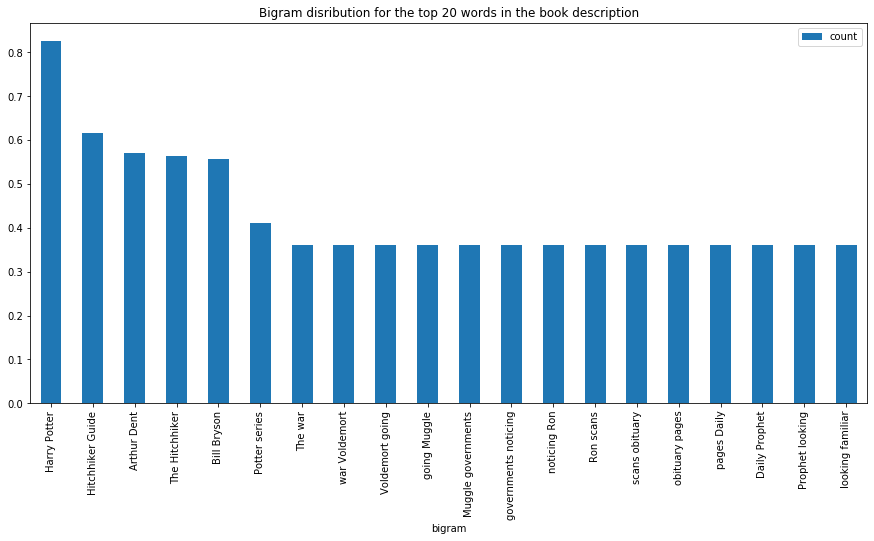

In [69]:
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

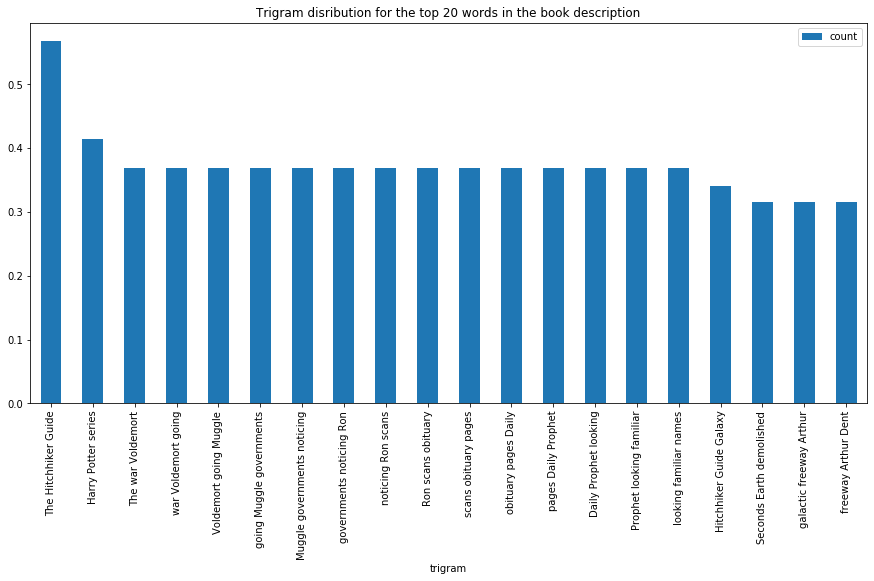

In [70]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['Desc'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [71]:
#Text Preprocessing
#Cleaning the book description.
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Desc'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
#Recommendation based on book title
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'url']].iloc[movie_indices]
       
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

AxesImage(54,36;334.8x217.44)


InvalidSchema: No connection adapters were found for 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEhIWFRUVFxUVFRUXFxUVFRUVFxUWFhUVFRcYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGisdHSUtLS0tLS0rLS0tLS0tKy0tLS0tKy0tLS0tLSstLS0tKy0tLS0tLSstLS0tLSstLS0tLf/AABEIAQoAvQMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAADAAECBAUGB//EAEUQAAICAQIEBAMGAgQLCQAAAAECAAMRBCEFEjFBBhNRYRQigSMyQlJxkRWhscHR8BYkMzRDYnSSorPhRFNkcnOCssLx/8QAGgEBAQEBAQEBAAAAAAAAAAAAAAECAwQFBv/EACIRAAICAQQDAQEBAAAAAAAAAAABAhEDEhMhUQQxQRRhcf/aAAwDAQACEQMRAD8A8809GBnr/bN/R2vy7HJ7Z3xMzQ0nA5th6TqKuFmkZZCSQr47BTvjY5z6kgb7ThlyKCPRjhrZVq1LKwJIziXm1rA9sbZxLGt1NNyqAqkqMFgvK+eUYOQN9z06bTHA5WIJ2Hf1E5wyanT4ZqWNxWr4XLcWbqenXP8AfpCVagVj5sk9veZo6FgT9Myk3EmCYY98gkTtVnJsv28dPNjkXA7HtI6vxAMAKcHuQNpzOq1PMSZV82aoh0r8U5sew394FeKOMgKGGRn67AD39pgCyWkdguVyOmf16iAdBpuLsTjy2X/2kg9vp1H7yWtdmTIJJ67Aictdrrfzt1B+o6SJ4jdnPmN9Dj9ooh1eiNrDvt1B9dj/AFiad1DevWcPpuK3Kc+Y3r1nQ6XxECRzg4koFm/SovzWHA/czH1WuoBwqE/rtLPEeIrYMDPfE5u6s5lQDXalGP3AP0hqOGq68wOB7zOAxLJ1RxgbD0lKQv04BxnMAyCTdsweDAJrVtG8uLJizAEu0d7DEu8I1eMQDd1Nygc6tuvTHt02nT8T1999YCuCbAvIRgltgflG2Ce46Dt6Tzo2FsKO+NvU9JucOW6qw1LqBnk5GUea3l4dGwvKPlYHHzDp808+aPKd+j0YfTTVmv4dqeu5heNiAAwJwSQGOCAd+U9GwD7iB4xxCv4l1pbmrGFB7DA3C+gBOMe0lxfVanUMN6qWw68tfmZIT5HJ65wqL77LjeczqNIaG5WYZ+UgYIyrDIO42/Q77TOPmepvk1ki1GqOx4aqMDzNtOR41rCbGHYEgbdu0INcQNjMzU2czE+s9KVHmZDzDG5pDMUpCXNCNqGIxnb0gYoARbTJNdntAxQDf0fh9raEtS1DZZ53JpyGFjrTjnNbfdZt88mxODjMXhjQpqLBW9wrLlFryjuHZ2CgZQfKN+pmtwChyvC7B8qUXaq22z8Nddd9Fjs56KOXI36kgd8TF8MW51ul5RgHU6fC+gNyYHX9BBDY1nD6xclFditzulZblYAMzBDkMAdsytXwXmt1VfmD/Fkuctyn5/KcIQB1XOe/SU69WfjUx21SgfS8YmuLANVxdU6CnWkEkfh1NfpAOfurUZGZWAHWADSQMFD+UDuDIsgG0CuYU+8AkKcbmRWrMfmJMYtAHHtHMHvJEmAAVsHI6jBH69RNP+NtzM3l15cfPjnHOQQQThttx0GBuZlRZmXFP2dFJx9GseOWcyvhcjzdsHDC05cHfpvtjEo6q/nbmwF2AwObG234iT/OABizCjFeg5yfDYTnMGTEDGM0ZIxR4xkZkQjRYikA8UUUqB23CqxdodNpXVuWx9e/mK7qKjTXS62WJnkdN8HIzvsQdjz/AIQJOt0ex/zjTHA3I+2SVE4neKjQLnFJJJrDEIScZyB1zgbH0EbQ8Rup5vJusqLABjW7VlgDkAlSM9T+8pAyqV1K5yD54O4IP+V2O86PXWtpuIa5n0lttdx1VPJ9pWGV7gxZXCHI+TsO85TVa22xg9ltljAABndnYAbgBmJIAJP7y2vH9Zkn4zU5O5+3u65z+aAX69ToucZ4fcM5+T4pu+MYzTzEfWYuMGbSeLuIA83xuoz6+a5/pO0wnck5O5PX9fUwUIzyDvmDzFmAER4gYPMcGAGZ5BmkMxiYAopPEblmbN0QjmORGMtgUUQjSkGiiMUEFFHiMhBooooAoo0UWCWYsyOYsxYJExSOY+ZQPmLMjHgD5ijRCASjNEIzQCyVkSJLMiZzOroaQMlIykGjRRQQYxAR8S5wfR+dfTSSVFttdZYDJAd1UsB6jOZpMhUjYmpxbhgqCWV2ebTYWCvy8jB0I5q7EyeVxlT1IIYES9w3gdFlemDXWJdq3sSv7NXqDLb5Siwhg45jjcA4znEEs5yMZO5CpKnqCQcb7g4OJZ4Rp6bLOS+40owbFnLzKr4+TzANxXnqRuIZCnEZsaXw9b8WNJb9mQea19iqUgc7XhuhTk3B75H6SHB+HVXXWZd1oqS29m5QbfJrxgBc8vmHmQdcDJPaShZkkR8Q1dJssCVKzF25a12525mwinG3McjptmbF3CtHUxru1jmwHlY00eZUjA4YF2sU2YOd1GNtsy0LOfjy9xfhjaewIWV1ZEtrsT7llTj5XXO46EEHcEES5xTw89Om0+q5g9d6Akgb1OeYitxnoQMhu+/TECzHEaIzS4vwwU211KxcvVp7DkAENcivyDGc45hg/wBkAzY4mnruGL8a+loJK/EHT1FyMnNvlKWIAHXvjtA8YopruauhrHVCULWKqFnUlWKqCcLkbZ39YoFMRMI2YzSgOI0liRxOZ1GjZj4iIlIQjxYj4kINNbwi+NdpD/4nTj97UH9cyiJp+Fv890n+1ab/AJ9coZc4vp20+lWi0ctr6h9R5ZxzpUKvKUuvVS5JIB7JnabvC9dy6LS6bmFNl9eq8nU4VXrc6hwKzZjmWqzAUsCMHBmF4r0wHlW+UKbLTeXrXmClUt5a7grElecFts4PJkbGQ44mNJoBgjNWoO/QhtVZg/XE1ZlLgxNTp2rdq3Uq6EqynqrA4IMHidLpk/iCCs/55UmK2JA+KqQbVMTt5yKPlOfmVcHcAyn4c4YlrNddkaWgCy9uzDPyUKfz2HCjvuT2kKaGv4g9PDqdOzBrLgWB256dEWBSnmG/LY68/KTsq4xvMvwvrFq1SGzeqzmouHrVcprf9uYN+qiVuJ699Ra91mOZznA+6qgAIi+iqoVR7KIfgnCbNRYAoIRSDbadq6qxgu7v0GBk4zk7AbkS2SqRb4JjQ8SrF7YGnvauxxvjBas2AegzzfSVNT4b1dVgp8ix2P3DWjWLao/HWygh1OM5H1xG8Ra8ajVX3qMLZa7KD15Sflz7kAE+5Mq1a65ENaXWLWeqLY6of1QHB/aLFGn4l+RdNpSQX01LLaQQQtllz3NVkZBKc4U4PUH0mhquK+QdKlimyizQaVdRTkDnQta6lSfuuhYMrDoR6EzlAJteJ1IOlGP+w6TGe4Ksc/uT+0JmWgHHuEeQysjeZRcC+nuxjnQHBVh+GxT8rL2PsRD+K7D8QhBIK6fRYIPzKRpKWBBG4OTnP6RcB19ZVtJqWxRcQQ/X4e8ZCXgZ+782HHdf0k/GumarU+W+OZKdKrgHmCsNLUCA3Qjocj1gfTEruZWDqSHUh1bfIYHmDZ9cjM2vF9am8ahAAmrRdSqj8LPlblI7YtS36YmRpdLZa4StGdycBUUsT9BNbxNyoNPpQwZtNUyWMpyvm2W2X2IpGzBDZyZHdWhFMSMY8Z5QXvKkTXNI6UyB0pnlWRHteFmeK4xSaa6Qxm0Zl3UTZZmFIgk0fhYhpZdxDaZQ5I6qQQQSCCCCCQQRuCCOhB3zL500iaDJuDaZTuZ3Ys7MzHqzEsx7DLMcnb19JB7GIALMQowoJJCgnJCgnYZOcD1l00mQbTzSyGXiaKWIRXYKU5m5SQxXJ5Sw2DFc4JGTg+8P5ERrjWTbKoWE8+wIag7iskM1YZhWzDGGKZ5SwwN8dhC8sGySqRHEr8sjiGKyGJqzFEMSdjs2OZmbACjJLYUdFGegHp0ElyxsQTSDxHdyTkkk7DJJJwBgDJ7AAAewkmg5bI0E0+qsrJNdjoSpUlHZCVPVSVIypwNum0EIopqzIozmPGeUh3g0okxohGOoGYVNUJ8ZuR+jSiRGkEFdpx6Sy14gjcDInINRM9qpEVSw5g0YTrbOLiiJojeRDiwROwktl0or+TBPUJYZ4Jmmk2ZkkAaqAeqWy0EZtNnGUUU2SCZZedZUsnWLOEo0VmEgBDNB4nVM4tDRGJopURkGEgVljlkGWWzLQAiNiEIjYlMNEIziExIOJqyUdOzyJ1Bk7ElexJ4FR9aTaCWawyC6yVXEAxnRQTOTyyReOukBq5nFo3NNbaObzM0hrJocHHn2qmcLu1jfkqQc1jn9FDH9cDvOdLTo9DqvgtMH5Ee3VggLYvOi6RW3JXIz5rjbtin3l2kZeeVcEuOVCqzCEtW6rZSxGC9TjKkjsw3U+6mUKLOZlXOOZgv7nGZpHW/G6dkNdddulDXVCpORXpJHn18ufvAnzRjr88wNK/zp/wCZf/kIeNWVZXXPs3+PV6el7Ka2tayuxkYv5YQhSVYgLvnIGM9pPh2koeunzPPNl9tlS+VyELyeTgmtly+9u4DDYQXjHitjarU1Hk5BfZjlqpVvlsbGXVQx98nfvNHhHFxVo6KLHaurUtqg1qHlelg1CpYCpBKZ2Zc7gn2mlBWYeSWkwdXX5dj1lg3I7pzDoeViuR7HEPwPS0XXJTd5g8x660NZTYuwXLc4ORuOkz+IaZ6LGrsADLjcHKsCMqyN+JSCCD3Blnww+dbpf9oo/wCasyo8mpzuJU4iKg5FPPyjb7Tl5sjr93bEu0cJqrRLNXYyCwc1dNah73Q9HPMQtSnsWyT1xjeUtFWtmprR/uPciP2yjWBW6exMN4kvZ9XqGfHN5tikDGAEYoqj2CqAPYTpRyu+CpxA0l/sFsVMDa1lZ89zlFAx7Y+plYSRmz4ZpVWfVWLzV6YB+Xs9xOKK/q3zH/VRoD4C8a4EKaUZWLWIVr1aEbUXWLz1qMdRjmQnJw6Ed5z7Tq9D4kFrvVqa6Er1XyX211KjhnbK3ls7lHw+/oZzvENI1Nj1OMMjFD+oOMj2PUexlf8ACK/TNE+HSdCusRsnmt82rutSOEFy46qCcN6ZB6TD5J03x1mn0+gsrOGHxhwd1ZDcoZHX8SMFIIPXJgeMcOrNY1emBFDsFevOW01p/wBG57oeqN3BwdxvWRf0pcU4YldOlsUsWursdwcYHLa1a8uBnouTmZT1zoePN9johjYadiPrqb9/5CYryNhLg66zSypbp50VlO0pXUz5Mcp96eJHPXUSlZSZv26aCGknpjlo8s8NmH8OfSN8MZ0S6GEOgGJXnM/lMfgvB/PuWtjypu1j/kqQFrG/3Qce5EHxfUm+1rOXkXZa6x0rqQYqrH6KAP1ye8130eOn9we0CdD7SrOqMPxXdmXwvVPp7kuT71bZx2YdHQ+zKWU/qYfjPDFp1Cio5ps8u6g9T5Tt8itn8SkFT7rLn8P9pCzh3tNLOjD8VlfxfWRrtV/69v7FyYuJIRo9FtjLaxv1+0qXP/CR9BFZot95BtJN7qOexJFnhjLqkTSWsEsQEaW5jgAk5GmtPatiTyt+An0OJHwZoLX1tJWtmFV1ZsI+6gD7lmGwGx774lN9LANRNrImYliaG1+htofksRq3wGAJGQMnlYEbdu3pN3V6T+IN5+nKnUvjz9MStbNZyjnuo5iFZG6lQeZTnqMTnvIx0GJFq5pSTMOLRZ1/D7qMedVZWTnlDoyE42JAI3+k0vEH2C16IdasWaj31Lr0z6VoVQe/P6zDtZj1JPYZOZAsep7wS+w3abnFj8Rp69VnNtZTT6n8zYU+Rd75RRWfeses5zzZLzIK2mbvFVxpNDt1GqP1Oo3/AKBK3BOIChyWTnqsU13V9PMrJBIB7MCAynsVHvMwXSYtEDijofFukrqGlWuwWL5BKsPxVtqb2rY9g5BIYdip9pztgi80RNYIYVJHqbV+0rW0+0tiwRMwn59Oj9DZlPp4y6eaDYkcrOmpgreTEa5Oy8CQN4jkWRFOZNdOJMOIQOJG2AXkiAurEtNZKF94ljbDfZV1CgSo5i1moycSq909cIs8k8isja0qu8jfdmVnsnqhE8WTJyTe2CNkE7SBnZRo8zkFLwbPIRpoxYjFHilA0cRAx8QBozGSAjNKQ7tOI+8KOITlFvMJ8SZ8386PrryjpG4h7ytbxH3mE2oME9pmo+OjEvJZsNrc94SvV+pmB5hkluM28KOf6GdOvEVEd+I5nNC8yfnmYeBG15DN19f7zPu1nXeUfNJl7w5o0v1VVVueR2IYA8pICs2Ae3TrNRxJEnndFF7oFrJocV0CBa7qSxptB5ebHPXYuOemwjYsMgggDmUgy1odPpW09tj02l6fJBK3qqubWdchTUeUDlHc5ndRR5ZTbVmATIEQhWa/h/hlL89mpZloTlr5l6m208teM9Qo5rGH5UPrNow+OTAKxYl7W6B6rHqcYdGKt6ZBxkex6j1BEueHeHJbqaq7ASjFuYA8pICM2A3b7oi16Gl1ZicsYrOh4pwyvyar0qso8xnXybG58qqoRbWxVSUPPy7jqNiZlHTH0hySIotlILFidHXwVLqQ1HN51S5upJ5jYuf8vT3IA+8nYDIOMwWv4StVFOQfPsza25wlJGKlK/mYgvnsOX1l1Imn4YIEfEtjSn0MXwp9JNaLtsqYjNLo0h9IzaM+kutF230dBZwZvSAfhbDtPSG0q+kgdCnpPjrypI+q4Y2eatwx/SRPC39J6V8CvpGGhT0mv2SM7OM81HDG9IReGH0now0SekJ8EnoIfly6GzjR5r/DW9JNeFv6T0f4NfSN8IPST9chtYzzwcIf8s1/CnDWXWUMR0f/AOpH9c6s6ceks8KoUX1nH4h/0lh5MnJCeOGlnE08Lb4KxCOmopZeuxNN4Y/UBf2EWi4O/wALqRg/M2m/4XsM7e6lVRahg4JdyNxzkYABHXA2/UmWdNoz5Tj5fmNZGWUEgc2difcTpvyuv4cXGGm32eZ1+HX/ACzob9Lbp0TTVcmE+a3mrqt5r2HzkeYpwFHKgx+U+s6nRVBc2HHyfdH+ufu/QYLfQSm1ff8AnOb8maj/AE6aMcpeuEYXE+EnUot7AeamKrsAKGAH2NnKAADgFTjb5RF4c4MU1FbjYrzkEdj5T4nS6HAYhvuuOV/0P4vocH6Q2ho5bsHB5fMGdsHCP0MqzSbTv/SNRjGUa/w5rinBjqf8YO9mALgSTuNhYvop7gbA9t5nLwH2nYadih5lx6YO4IPUEdwZPVUpsUOzfh/Ep7qfb0MxLLKStPn6ag1B6a4+HNcG4GVtFueVasWMQSCeU7KCOhY7fUyvruHWXWNa+OZyWPp7AewGB9J2GqQIoqGM55rMfm7LnuFH8yZW8sSSzSS02WLi3qo5L+Bn0jjgp9J1Yrj+WJjel2dLj0coOCGL+Bn0nVcgkSBG7IXHorJrMmWUszBpwjG/OP5yymiI/EJyYlKHwGzwTaoCWbNET+IQCcKx1cGKInD6DGqBhkukTw7H4l/nCDQn8yxQbgOrwkimjI7gwj1n+5kMNoA8jJvUYhSYNWiJkPMhzp9usG2jPqIQTiBsuxIV6iF/h/qwi/h47MP5ymtUCJukhbCDRD1jro19TLTJcQfnxedmS+CT1MKukQdAYojlECbpH4gS2dOh7fzkfha/SKJriV/NjHUiW/hq/SMNNX+WShriVvOEE14mgNPX+WN8PX+WVIuuJI2xvNlcCSAnSjz2WFOYWwACVFbEVtpbrFckskbY3mwJjGKLYY3Qb6iCaCsjShqLA1GZMWynWsLLQtlnzpE3StiOZKQ1MObZJG36yviPLQsvLj1//ZAkb7yqI+ZKGoKGkueAzHzLRLDGyOHgMxwYoWHFkYvAgx8xQsKHiLwQjwgNFI8wyf3+kRMgJxsRLYPaOLj26QUhiRaFN5/v/wBJBrgewktlpAyZErJRD1lM0MBJYjAx8wUWI+IwMfMEFiPyyMrcV1RqossUczIhKj1boB+5E1FNuiMtR8TyTW+KNa4Kvcyg9lVU9dsgA+vedl4J4vfqVbzMYqwvMAeaxiDnmJO2NjsJ6MnjShHU2co5VJ0dTiPI5iJnms6jmOIPMYtFloKTEDBBouaQUGzGzBkxiZQzxv8AjGoznznzjGeYmSs47qTub36Y2Yj+iZxin3dEej5mp9mh/GNR08+zrn7x6wy+I9UP9M3THbH9HtMmKNuD+F1y7NgeJdUBjzifc4JhE8VaoEHnGy8vTt/b7zDMeR4odIbkuzoB4x1f5l6Y+77Yz16yH+F2r2+06ew3/X1/6TCimdmHSG5Ls2/8K9Xt9p93YbDt6+vWXE8b6jGCqnpvuP123nMRCXZh0Xcl2dWPHV3/AHa/Un0/tz/KTs8d252qA/VmPbvtOQEUbUOia5dnUp44uDE8inJzjLbf33/eK3xtay8pqXGc/ebr1BHoR6+u85WPLtw6GuXZ1J8aWZUiioBF5EUjPKuQcDPuF/aC4X4usoHKlNQUnmOAwLH3IO+2B07TmjJCTag+Ggskjr28fX4IFVYOdj8xwPTHeRXx5dkZrTHcZOTt69vWckIxmfz4+jW9Ps63/Du7f7NPbdttsfX1k28eXH/Qp27t9f3nICNH58fQ3p9nXjx3dv8AZJ2xu23r+8c+PLu1SdfVunpOQkhH5sXQ3p9nVv46v7Ig/c4/nA2eONTnYV/7rH+uc3ItKvHx9Ddn2f/Z'

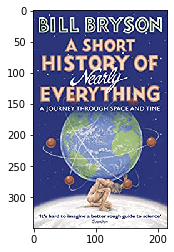

In [80]:
recommend("In a Sunburned Country", "Non Fiction")

In [103]:
#Recommendation based on book description
#We are using the same above function by converting book description into vectors.
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    global rec
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genre'] == genre]  
    data.reset_index(level = 0, inplace = True) 
# Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
     # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    # Get the index corresponding to original_title
       
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[1:6]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title']].iloc[movie_indices]
    
    # It reads the top 5 recommend book url and print the images
    
    for i in rec['url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))

In [105]:
recommend("Harry Potter and the Prisoner of Azkaban","Fantasy Fiction")

KeyError: 'Harry Potter and the Prisoner of Azkaban'

In [ ]:
recommend("Norwegian Wood", "Non Fiction")